<a href="https://colab.research.google.com/github/yasha-j10/Life-expectancy-prediction/blob/main/Project_LifeExpectancyPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn import metrics



In [ ]:
#loading the data
url = ('https://raw.githubusercontent.com/nehagianchandani/Life_Expectancy/master/Life%20Expectancy%20Data.csv')
life_data = pd.read_csv(url)

In [ ]:
life_data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
life_data = life_data.drop('Year', axis = 1)

In [ ]:
life_data.head()

,Country,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
status = pd.get_dummies(life_data.Status)

In [ ]:
life_data = pd.concat([life_data, status], axis = 1)

In [ ]:
life_data = life_data.drop(['Status'], axis=1)

In [ ]:
life_data.rename(columns = {'Developing' : '0', 'Developed' : 1})

,Country,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,1,0
0,Afghanistan,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,Afghanistan,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,Afghanistan,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,Afghanistan,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,Afghanistan,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,...,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,0,1
2934,Zimbabwe,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,...,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,0,1
2935,Zimbabwe,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,...,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,0,1
2936,Zimbabwe,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,...,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,0,1


In [ ]:
life_data = life_data.groupby('Country').mean()

In [ ]:
life_data.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,...,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250,0.0,1.0
Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,...,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750,0.0,1.0
Algeria,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,...,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250,0.0,1.0
Angola,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,...,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375,0.0,1.0
Antigua and Barbuda,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,...,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375,0.0,1.0


In [ ]:
life_data.columns

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Developed', 'Developing'],
      dtype='object')

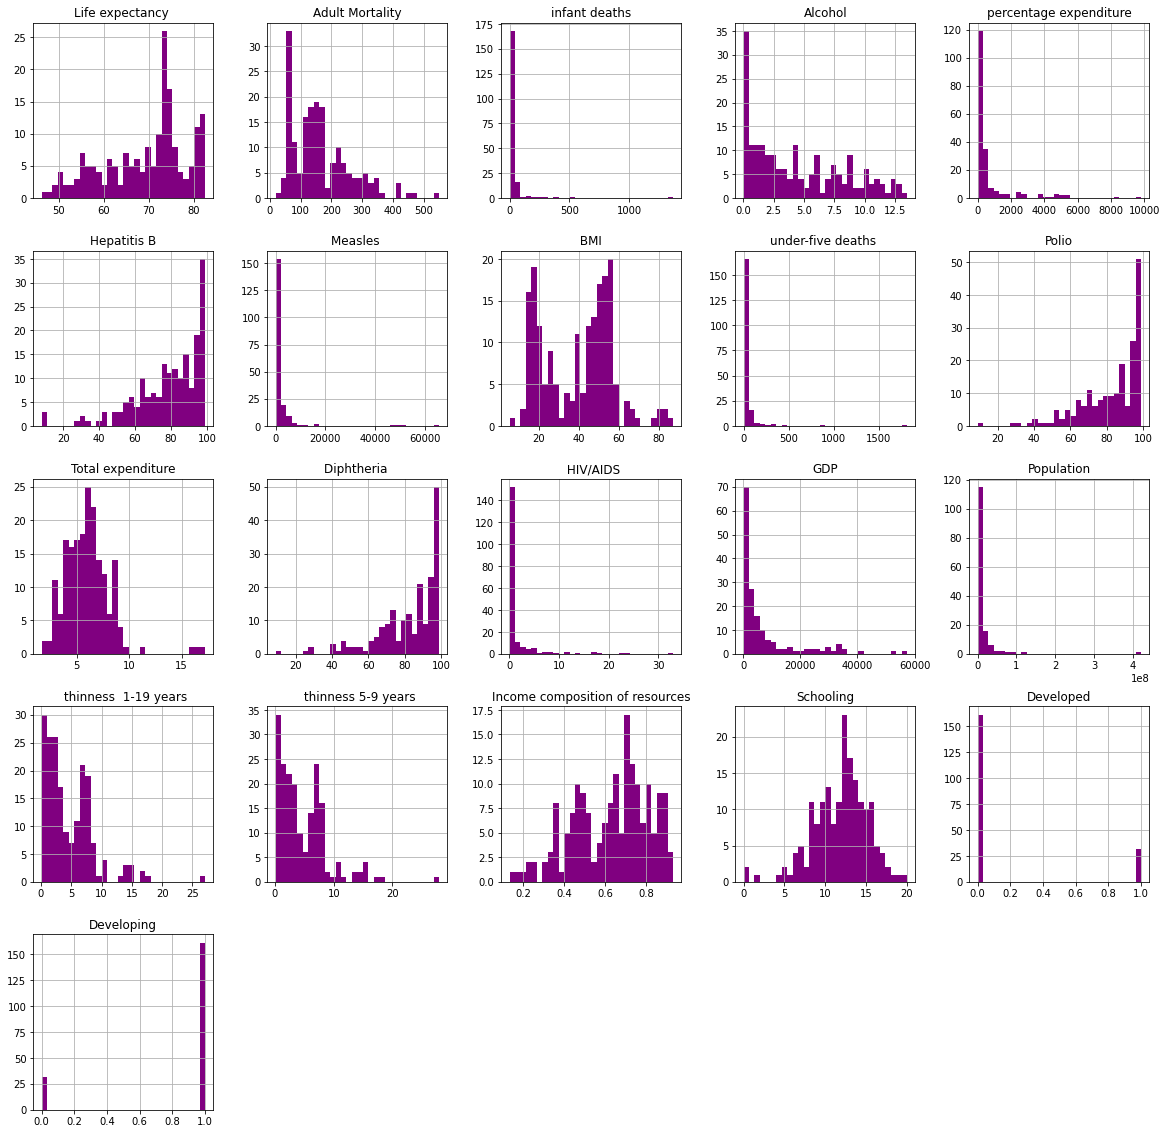

In [ ]:
life_data.hist(bins = 30, figsize = (20, 20), color = 'purple');

EXPLORATORY DATA ANALYSIS

Text(0, 0.5, 'Life expectancy')

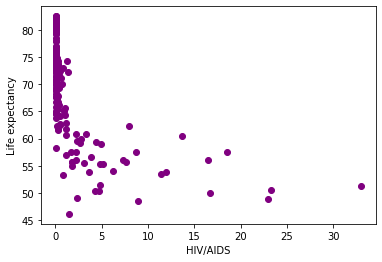

In [ ]:
plt.scatter(life_data[' HIV/AIDS'], life_data['Life expectancy '],color='purple')
plt.xlabel('HIV/AIDS')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

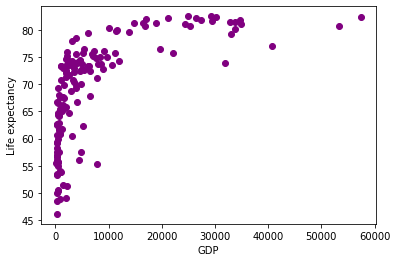

In [ ]:
plt.scatter(life_data.GDP, life_data['Life expectancy '],color='purple')
plt.xlabel('GDP')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

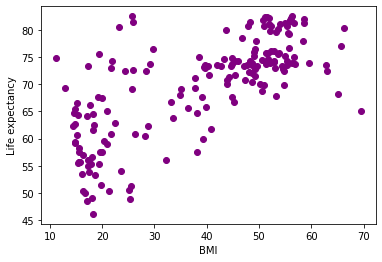

In [ ]:
plt.scatter(life_data[' BMI '], life_data['Life expectancy '],color='purple')
plt.xlabel('BMI')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

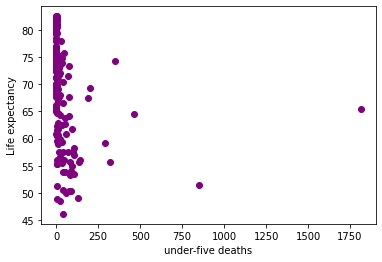

In [ ]:
plt.scatter(life_data['under-five deaths '], life_data['Life expectancy '],color='purple')
plt.xlabel('under-five deaths')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

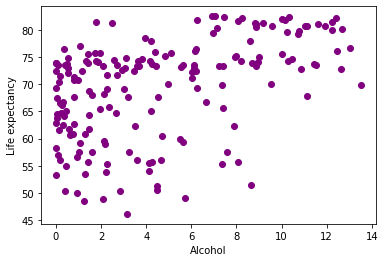

In [ ]:
plt.scatter(life_data['Alcohol'], life_data['Life expectancy '],color='purple')
plt.xlabel('Alcohol')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

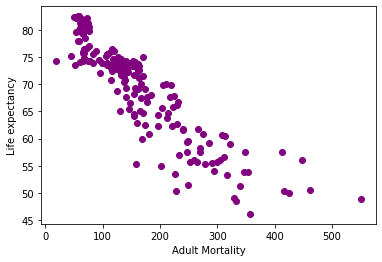

In [ ]:
plt.scatter(life_data['Adult Mortality'], life_data['Life expectancy '],color='purple')
plt.xlabel('Adult Mortality')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

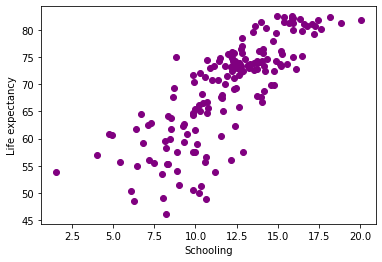

In [ ]:
plt.scatter(life_data['Schooling'], life_data['Life expectancy '],color='purple')
plt.xlabel('Schooling')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

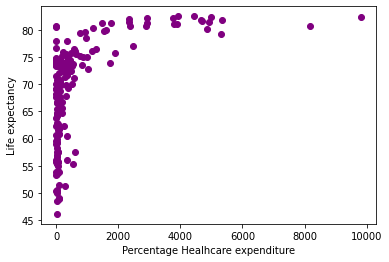

In [ ]:
plt.scatter(life_data['percentage expenditure'], life_data['Life expectancy '],color='purple')
plt.xlabel('Percentage Healhcare expenditure')
plt.ylabel('Life expectancy')

In [ ]:
life_labels = life_data['Life expectancy ']
life_features = life_data.drop('Life expectancy ', axis = 1)
X=life_features

DATA-PREPROCESSING

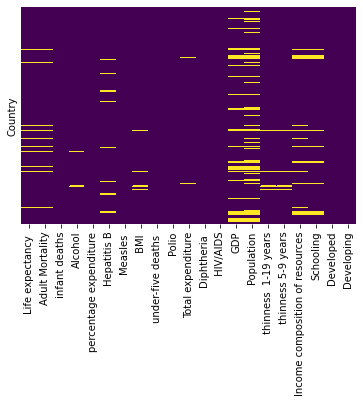

In [ ]:
sns.heatmap(life_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
life_features.isnull().head()

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Albania,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Algeria,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Angola,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Antigua and Barbuda,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [ ]:
life_features.isnull().sum()

Adult Mortality                    10
infant deaths                       0
Alcohol                             2
percentage expenditure              0
Hepatitis B                         9
Measles                             0
 BMI                                4
under-five deaths                   0
Polio                               0
Total expenditure                   2
Diphtheria                          0
 HIV/AIDS                           0
GDP                                30
Population                         48
 thinness  1-19 years               4
 thinness 5-9 years                 4
Income composition of resources    17
Schooling                          13
Developed                           0
Developing                          0
dtype: int64

In [ ]:
life_labels.isnull().sum()

10

In [ ]:
life_features.fillna(value = life_features.mean(), inplace = True)
life_features

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250,0.0,1.0
Albania,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750,0.0,1.0
Algeria,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,4.604000,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250,0.0,1.0
Angola,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,3.919333,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375,0.0,1.0
Antigua and Barbuda,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,4.791333,98.3125,0.12500,9759.305728,1.257006e+07,3.42500,3.37500,0.488625,8.84375,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),163.0000,9.3750,7.420000,0.000000,66.250000,165.0000,54.48750,10.7500,74.6875,4.998667,68.5000,0.10000,7223.452050,1.257006e+07,1.65000,1.56250,0.726812,12.78750,0.0,1.0
Viet Nam,126.5625,29.1875,3.087333,0.000000,87.538462,4232.9375,11.18750,36.5000,94.9375,5.977333,91.7500,0.14375,7223.452050,1.257006e+07,14.92500,15.62500,0.627062,11.51250,0.0,1.0
Yemen,211.8125,39.3750,0.047333,0.000000,55.687500,2761.1875,33.48750,51.6250,67.1250,5.005333,72.6250,0.10000,7223.452050,1.257006e+07,13.83125,13.75000,0.475500,8.50625,0.0,1.0


In [ ]:
life_labels.fillna(value = life_labels.mean(), inplace = True)

In [ ]:
stats.describe(life_features[1:])

DescribeResult(nobs=192, minmax=(array([1.87500000e+01, 0.00000000e+00, 1.00000000e-02, 0.00000000e+00,
       8.00000000e+00, 0.00000000e+00, 5.20000000e+00, 0.00000000e+00,
       9.00000000e+00, 1.64666667e+00, 9.00000000e+00, 1.00000000e-01,
       1.36183210e+02, 2.92000000e+02, 1.00000000e-01, 1.00000000e-01,
       1.31687500e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]), array([5.50062500e+02, 1.36668750e+03, 1.34973333e+01, 9.80181038e+03,
       9.90000000e+01, 6.58579375e+04, 8.73000000e+01, 1.81250000e+03,
       9.90000000e+01, 1.72400000e+01, 9.90000000e+01, 3.29437500e+01,
       5.73628746e+04, 4.21467691e+08, 2.71000000e+01, 2.79437500e+01,
       9.31437500e-01, 2.00375000e+01, 1.00000000e+00, 1.00000000e+00])), mean=array([1.64253396e+02, 2.85745443e+01, 4.46296480e+00, 7.12321318e+02,
       7.85909681e+01, 2.30174674e+03, 3.96797168e+01, 3.96419271e+01,
       8.26078218e+01, 6.01668050e+00, 8.23842541e+01, 1.67047526e+00,
       7.25930328e+03, 1.25835883e

In [ ]:
min_max_scaler = MinMaxScaler()
life_features = min_max_scaler.fit_transform(life_features)

In [ ]:
life_features

array([[4.71121045e-01, 5.72552248e-02, 3.24378429e-04, ...,
        4.09856519e-01, 0.00000000e+00, 1.00000000e+00],
       [4.95235855e-02, 5.03041112e-04, 3.58762543e-01, ...,
        6.05739239e-01, 0.00000000e+00, 1.00000000e+00],
       [1.68333137e-01, 1.48625783e-02, 2.94103109e-02, ...,
        6.34435434e-01, 0.00000000e+00, 1.00000000e+00],
       ...,
       [3.63369015e-01, 2.88105364e-02, 2.76802926e-03, ...,
        4.24516532e-01, 0.00000000e+00, 1.00000000e+00],
       [6.31572756e-01, 2.44660905e-02, 1.65290890e-01, ...,
        5.59575795e-01, 0.00000000e+00, 1.00000000e+00],
       [8.34960593e-01, 1.94356793e-02, 3.31570362e-01, ...,
        4.90330630e-01, 0.00000000e+00, 1.00000000e+00]])

In [ ]:
life_features_train, life_features_test, life_labels_train, life_labels_test = train_test_split(life_features, life_labels, train_size = 0.7, test_size =0.3)

CHECKING FOR ASSUMPTIONS OF LINEAR REGRESSION

1. MULTICOLLINEARITY

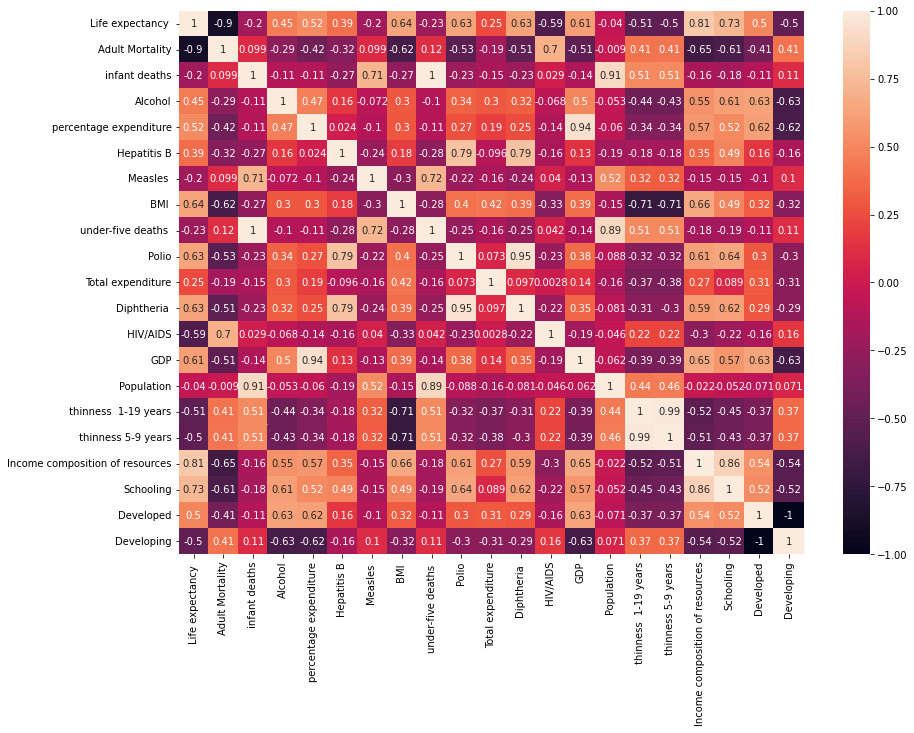

In [ ]:
plt.figure(figsize = (14, 10))
sns.heatmap(life_data.corr(), annot = True)

In [ ]:
import statsmodels.api as sma
model0 = sma.OLS(life_labels, life_features)
results = model0.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     117.6
Date:                Mon, 02 May 2022   Prob (F-statistic):           2.52e-88
Time:                        14:50:27   Log-Likelihood:                -442.13
No. Observations:                 193   AIC:                             924.3
Df Residuals:                     173   BIC:                             989.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -27.6446      1.994    -13.865      0.0

2. HOMOSCEDASTICITY

In [ ]:
from statsmodels.compat import lzip
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(results.resid, results.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 44.31111514793599),
 ('p-value', 0.0008550825632833272),
 ('f-value', 2.7134803293679584),
 ('f p-value', 0.00032654295767255446)]

LINEAR REGRESSION

In [ ]:
linear_model = LinearRegression()

In [ ]:
linear_model.fit(life_features_train, life_labels_train)

LinearRegression()

In [ ]:
print('Intercept:')
print(linear_model.intercept_)

Intercept:
61.25278047559356


In [ ]:
print('Coefficients: \n', linear_model.coef_)

Coefficients: 
 [-25.03946943  50.79685648   1.52887352   3.49401679  -3.47893531
  -1.46794993   3.5361368  -60.72242325  -1.34704546   4.04994994
  10.03493815  -6.20794432   0.52937578   6.91521146  -4.89084335
   7.67891448   6.91909918   4.15510931  -0.09555309   0.09555309]


In [ ]:
print('R_square score on the training: %.2f' % linear_model.score(life_features_train, life_labels_train))

R_square score on the training: 0.93


In [ ]:
linear_model_predict = linear_model.predict(life_features_test)

In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(life_labels_test, linear_model_predict))
print("Mean absolute error: %.2f" % mean_absolute_error(life_labels_test, linear_model_predict))
print("Root mean squared error: %.2f" %np.sqrt(metrics.mean_squared_error(life_labels_test, linear_model_predict)))

Mean squared error: 7.17
Mean absolute error: 2.05
Root mean squared error: 2.68


In [ ]:
print('R_square score: %.2f' % r2_score(life_labels_test, linear_model_predict))

R_square score: 0.91


FEATURE SELECTION WITH OLS MODEL

In [ ]:
import statsmodels.api as sma
model = sma.OLS(life_labels, life_features)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     117.6
Date:                Mon, 02 May 2022   Prob (F-statistic):           2.52e-88
Time:                        14:54:37   Log-Likelihood:                -442.13
No. Observations:                 193   AIC:                             924.3
Df Residuals:                     173   BIC:                             989.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -27.6446      1.994    -13.865      0.0

In [ ]:
X.columns

Index(['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Developed',
       'Developing'],
      dtype='object')

In [ ]:
#remove the following : GDP(P=0.852)
new=X.drop(['GDP','Measles ','Polio',' thinness  1-19 years',' thinness 5-9 years'] ,axis=1)

In [ ]:
new.fillna(value = new.mean(), inplace = True)
new

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,BMI,under-five deaths,Total expenditure,Diphtheria,HIV/AIDS,Population,Income composition of resources,Schooling,Developed,Developing
Country,,,,,,,,,,,,,,,
Afghanistan,269.0625,78.2500,0.014375,34.960110,64.562500,15.51875,107.5625,8.252500,52.3125,0.10000,9.972260e+06,0.415375,8.21250,0.0,1.0
Albania,45.0625,0.6875,4.848750,193.259091,98.000000,49.06875,0.9375,5.945625,98.0625,0.10000,6.969116e+05,0.709875,12.13750,0.0,1.0
Algeria,108.1875,20.3125,0.406667,236.185241,78.000000,48.74375,23.5000,4.604000,91.8750,0.10000,2.164983e+07,0.694875,12.71250,0.0,1.0
Angola,328.5625,83.7500,5.740667,102.100268,70.222222,18.01875,132.6250,3.919333,47.6875,2.36875,1.014710e+07,0.458375,8.04375,0.0,1.0
Antigua and Barbuda,127.5000,0.0000,7.949333,1001.585226,98.266667,38.42500,0.0000,4.791333,98.3125,0.12500,1.257006e+07,0.488625,8.84375,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),163.0000,9.3750,7.420000,0.000000,66.250000,54.48750,10.7500,4.998667,68.5000,0.10000,1.257006e+07,0.726812,12.78750,0.0,1.0
Viet Nam,126.5625,29.1875,3.087333,0.000000,87.538462,11.18750,36.5000,5.977333,91.7500,0.14375,1.257006e+07,0.627062,11.51250,0.0,1.0
Yemen,211.8125,39.3750,0.047333,0.000000,55.687500,33.48750,51.6250,5.005333,72.6250,0.10000,1.257006e+07,0.475500,8.50625,0.0,1.0


LINEAR REGRESSION WITH SELECTED FEATURES ONLY

In [ ]:
new_train, new_test, life_labels_train, life_labels_test = train_test_split(new, life_labels, train_size = 0.7, test_size = 0.3)
linear_model = LinearRegression()

In [ ]:
linear_model.fit(new_train, life_labels_train)

LinearRegression()

In [ ]:
print('R_square score on the training: %.2f' % linear_model.score(new_train, life_labels_train))

R_square score on the training: 0.92


In [ ]:
linear_model_predict = linear_model.predict(new_test)

In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(life_labels_test, linear_model_predict))
print("Mean absolute error: %.2f" % mean_absolute_error(life_labels_test, linear_model_predict))
print("Root mean squared error: %.2f" %np.sqrt(metrics.mean_squared_error(life_labels_test, linear_model_predict)))

Mean squared error: 5.59
Mean absolute error: 1.92
Root mean squared error: 2.37


In [ ]:
print('R_square score: %.2f' % r2_score(life_labels_test, linear_model_predict))

R_square score: 0.93
